In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 18

In [ ]:
# Seed 42
exp_results = '../results_gaussian/algorithm_exp/adult/LR/full_data/20250727-215942.csv'
two_results = '../results_gaussian/algorithm_two/adult/LR/full_data/20250727-215942.csv'

exp_results = pd.read_csv(exp_results)
two_results = pd.read_csv(two_results)

In [3]:
exp_results

,run,algo_name,sample_cost_fixed,label_cost_fixed,eps,tau_prime,f_0,policy,sample_cost,label_cost,eo_diff_est,eo_diff_true,num_samples,true_fair,pred_fair
0,1,exp,0.5,0.25,0.800,97.2903,LR,full_data,60.0,29.75,0.129511,0.171359,113,1,1
1,1,exp,0.5,0.50,0.800,97.2903,LR,full_data,63.0,62.00,0.166996,0.171359,97,1,1
2,1,exp,0.5,1.00,0.800,97.2903,LR,full_data,49.0,95.00,0.140491,0.171359,119,1,1
3,1,exp,0.5,3.00,0.800,97.2903,LR,full_data,51.5,306.00,0.160921,0.171359,92,1,1
4,1,exp,0.5,0.25,0.500,97.2903,LR,full_data,52.0,25.75,0.146756,0.171359,265,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,5,exp,0.5,3.00,0.010,97.2903,LR,full_data,59.0,336.00,0.136311,0.171305,3927,0,0
136,5,exp,0.5,0.25,0.001,97.2903,LR,full_data,50.0,24.25,0.132172,0.171305,3874,0,0
137,5,exp,0.5,0.50,0.001,97.2903,LR,full_data,48.0,47.00,0.153514,0.171305,3938,0,0
138,5,exp,0.5,1.00,0.001,97.2903,LR,full_data,50.5,101.00,0.147163,0.171305,3970,0,0


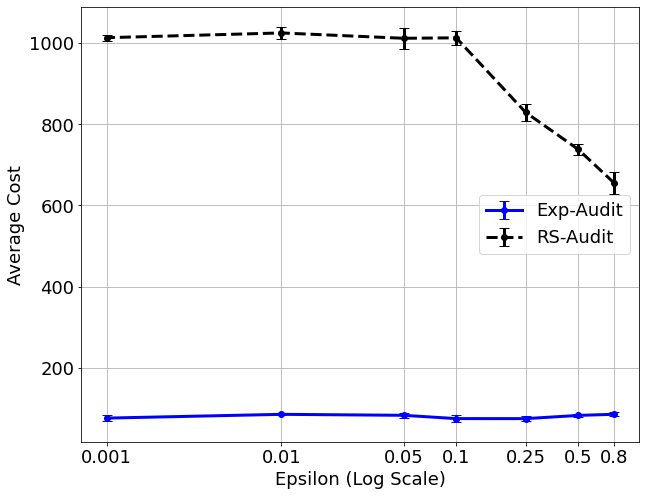

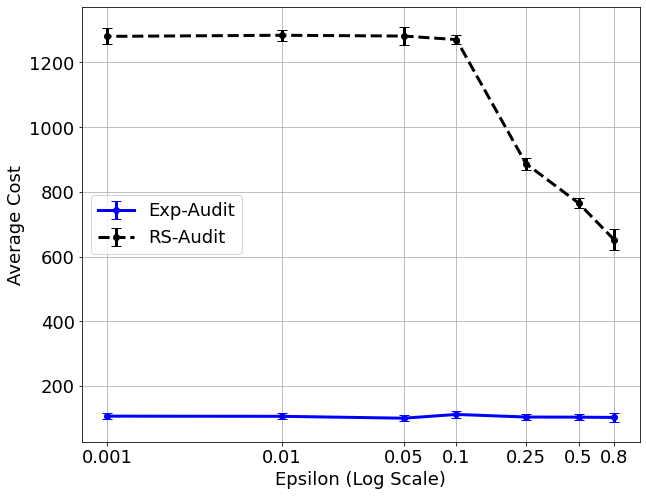

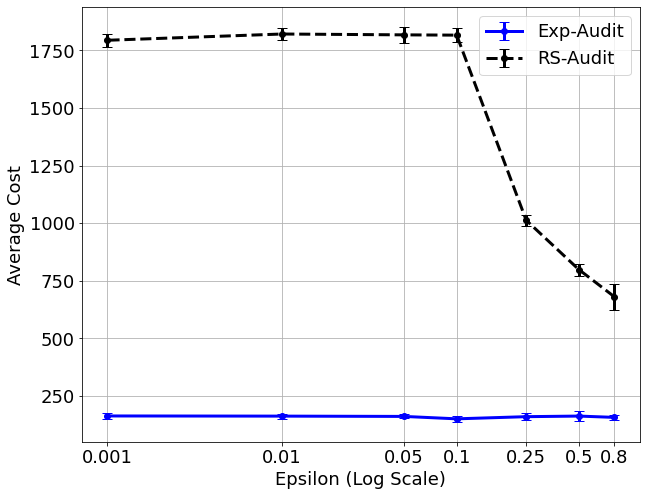

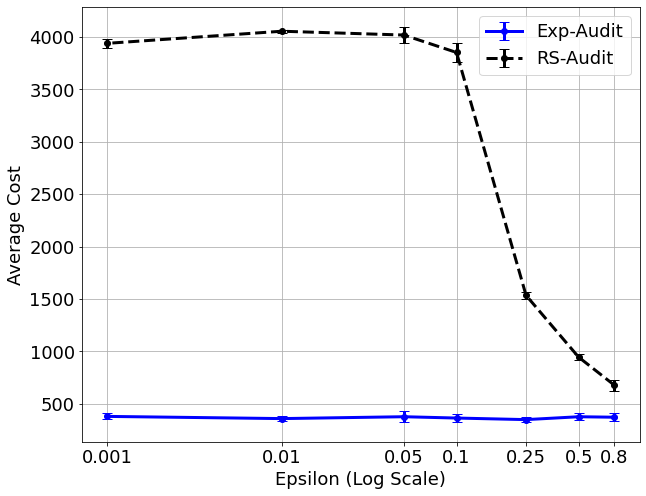

In [4]:
eps = [0.8, 0.5, 0.25, 0.1, 0.05, 0.01, 0.001]
costs = [(0.5,0.25), (0.5, 0.5), (0.5, 1), (0.5, 3)]
for curr_cost in costs:
    plt.figure(figsize=(10, 8))
    cost_exp = {}
    cost_two = {}
    for run in range(1,6):
        run_data_exp = exp_results[(exp_results['run'] == run) & (exp_results['sample_cost_fixed'] == curr_cost[0]) & (exp_results['label_cost_fixed'] == curr_cost[1])]
        run_data_two = two_results[(two_results['run'] == run) & (two_results['sample_cost_fixed'] == curr_cost[0]) & (two_results['label_cost_fixed'] == curr_cost[1])]
        for e in eps:
            exp_data = run_data_exp[run_data_exp['eps'] == e]
            two_data = run_data_two[run_data_two['eps'] == e]
            if run == 1:
                cost_exp[e] = [exp_data['sample_cost'].values[0] + exp_data['label_cost'].values[0]]
                cost_two[e] = [two_data['sample_cost'].values[0] + two_data['label_cost'].values[0]]
                #cost_exp[e] = [exp_data['label_cost'].values[0]]
                #cost_two[e] = [two_data['label_cost'].values[0]]
            else:
                cost_exp[e].append(exp_data['sample_cost'].values[0] + exp_data['label_cost'].values[0])
                cost_two[e].append(two_data['sample_cost'].values[0] + two_data['label_cost'].values[0])
                # cost_exp[e].append(exp_data['label_cost'].values[0])
                # cost_two[e].append(two_data['label_cost'].values[0])
    # Average out the costs
    avg_cost_exp = {e: np.mean(cost_exp[e]) for e in eps}
    avg_cost_two = {e: np.mean(cost_two[e]) for e in eps}
    std_cost_exp = {e: np.std(cost_exp[e]) for e in eps}
    std_cost_two = {e: np.std(cost_two[e]) for e in eps}
    # Plot error bars
    plt.errorbar([np.log10(i) for i in eps], list(avg_cost_exp.values()), yerr=list(std_cost_exp.values()), label='Exp-Audit', marker='o', capsize=5, linestyle='-', color='blue', linewidth=3)
    plt.errorbar([np.log10(i) for i in eps], list(avg_cost_two.values()), yerr=list(std_cost_two.values()), label='RS-Audit', marker='o', capsize=5, linestyle='--', color='black', linewidth=3)
    #plt.xscale('log')
    plt.xticks([np.log10(i) for i in eps], [str(i) for i in eps])
    # Increase tick size
    # plt.xticks(fontsize=14)
    # plt.yticks(fontsize=14)
    # Increase font size of labels and title
    # plt.tick_params(labelsize=14)
    # plt.legend(fontsize=14)
    plt.xlabel('Epsilon (Log Scale)')
    plt.ylabel('Average Cost')
    #plt.title(f'Average Cost vs Epsilon for Sample Cost')# {curr_cost[0]} and Label Cost {curr_cost[1]}')
    plt.legend()
    plt.grid()
    plt.savefig(f'average_cost_eps_{curr_cost[0]}_{curr_cost[1]}.png')
    plt.show()

<Figure size 1000x600 with 0 Axes>

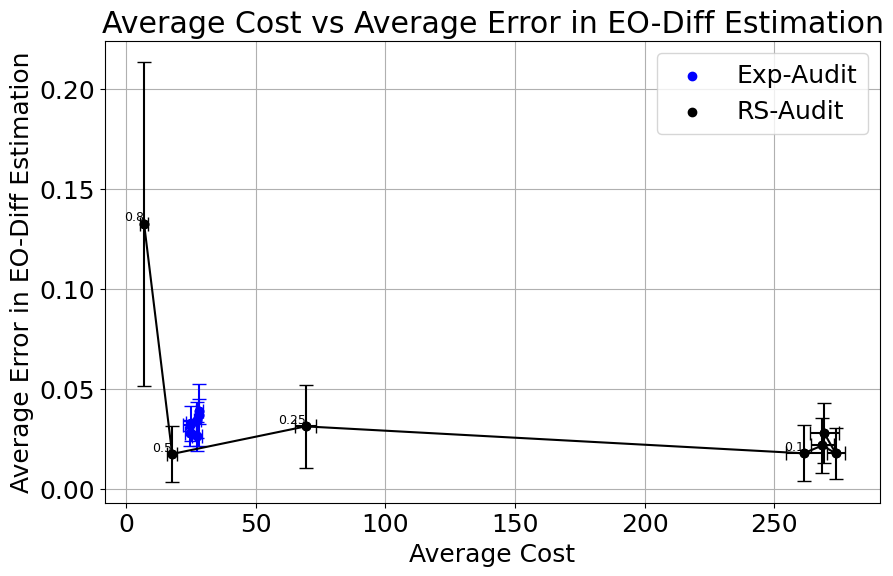

<Figure size 1000x600 with 0 Axes>

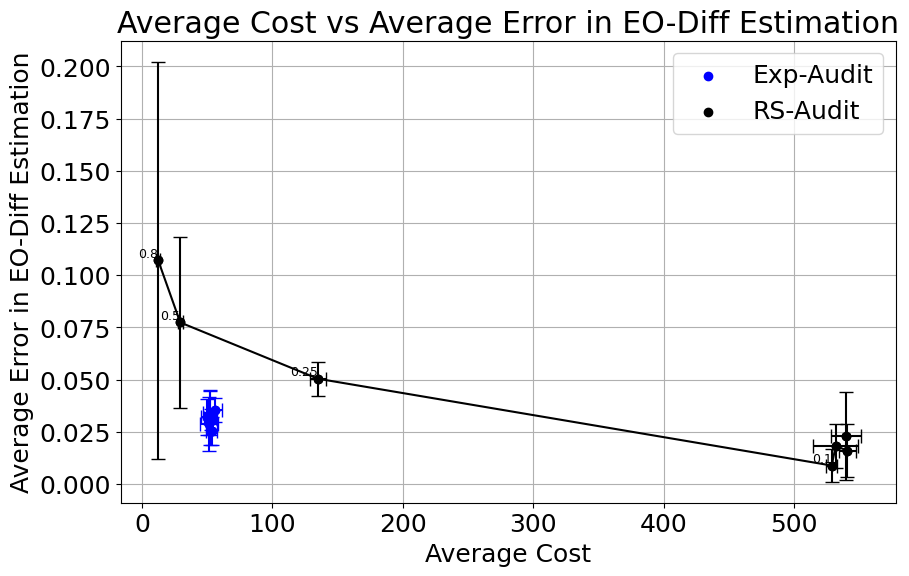

<Figure size 1000x600 with 0 Axes>

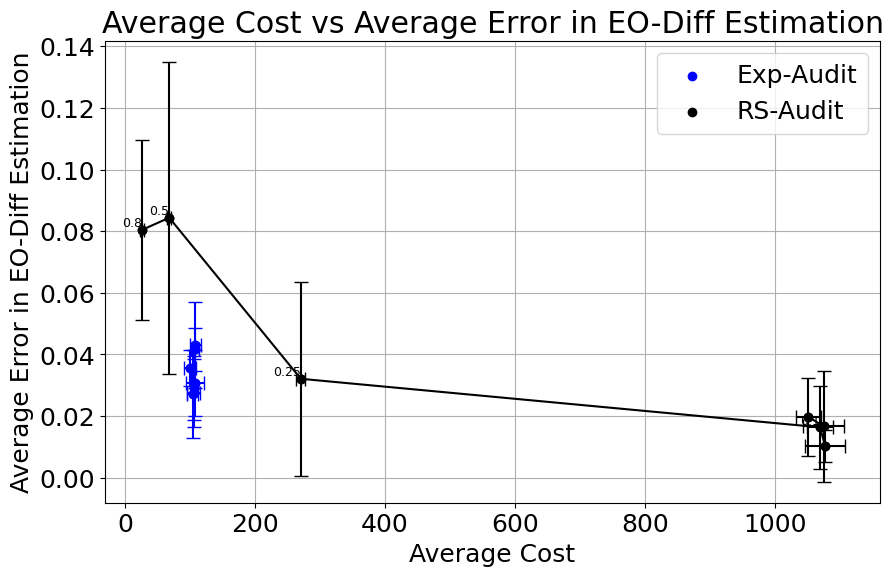

<Figure size 1000x600 with 0 Axes>

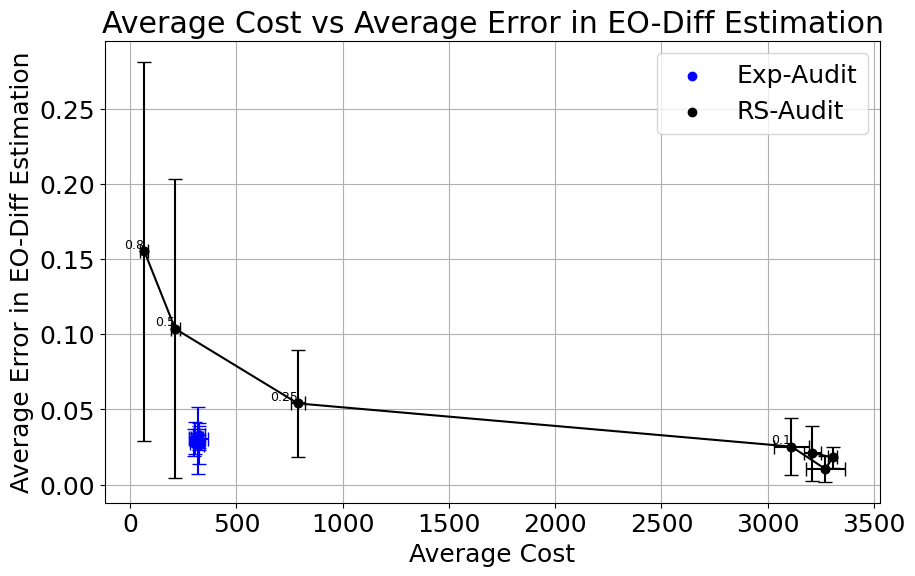

In [5]:
# Cost vs error in estimating EO-Diff
for cost in costs:
    plt.figure(figsize=(10, 6))
    cost_exp = {}
    error_exp = {}
    cost_two = {}
    error_two = {}
    
    for run in range(1, 6):
        run_data_exp = exp_results[(exp_results['run'] == run) & (exp_results['sample_cost_fixed'] == cost[0]) & (exp_results['label_cost_fixed'] == cost[1])]
        run_data_two = two_results[(two_results['run'] == run) & (two_results['sample_cost_fixed'] == cost[0]) & (two_results['label_cost_fixed'] == cost[1])]
        
        for e in eps:
            exp_data = run_data_exp[run_data_exp['eps'] == e]
            two_data = run_data_two[run_data_two['eps'] == e]
            if run == 1:
                cost_exp[e] = [exp_data['label_cost'].values[0]]# + exp_data['sample_cost'].values[0]]
                cost_two[e] = [two_data['label_cost'].values[0]]# + two_data['sample_cost'].values[0]]
                error_exp[e] = [abs(exp_data['eo_diff_true'].values[0] - exp_data['eo_diff_est'].values[0])]
                error_two[e] = [abs(two_data['eo_diff_true'].values[0] - two_data['eo_diff_est'].values[0])]
            else:
                cost_exp[e].append(exp_data['label_cost'].values[0])# + exp_data['sample_cost'].values[0])
                cost_two[e].append(two_data['label_cost'].values[0])# + two_data['sample_cost'].values[0])
                error_exp[e].append(abs(exp_data['eo_diff_true'].values[0] - exp_data['eo_diff_est'].values[0]))
                error_two[e].append(abs(two_data['eo_diff_true'].values[0] - two_data['eo_diff_est'].values[0]))
    # Average out the costs and errors
    avg_cost_exp = {e: np.mean(cost_exp[e]) for e in eps}
    avg_cost_two = {e: np.mean(cost_two[e]) for e in eps}
    avg_error_exp = {e: np.mean(error_exp[e]) for e in eps}
    avg_error_two = {e: np.mean(error_two[e]) for e in eps}
    std_cost_exp = {e: np.std(cost_exp[e]) for e in eps}
    std_cost_two = {e: np.std(cost_two[e]) for e in eps}
    std_error_exp = {e: np.std(error_exp[e]) for e in eps}
    std_error_two = {e: np.std(error_two[e]) for e in eps}
    std_error_two = {e: np.std(error_two[e]) for e in eps}
    eps_vals = avg_cost_exp.keys()
    # Scatter plot with error bars on both axis (with eps_vals as text with each point)
    plt.figure(figsize=(10, 6))
    for i, e in enumerate(eps_vals):
        #plt.text(avg_cost_exp[e], avg_error_exp[e], f'{e}', fontsize=9, ha='right', va='bottom')
        if e >= 0.1:
            plt.text(avg_cost_two[e], avg_error_two[e], f'{e}', fontsize=9, ha='right', va='bottom')
    # Plotting the average cost vs average error
    plt.scatter(list(avg_cost_exp.values()), list(avg_error_exp.values()), label='Exp-Audit', marker='o', color='blue')
    plt.scatter(list(avg_cost_two.values()), list(avg_error_two.values()), label='RS-Audit', marker='o', color='black')
    # Adding error bars
    plt.errorbar(list(avg_cost_exp.values()), list(avg_error_exp.values()), 
                 xerr=list(std_cost_exp.values()), yerr=list(std_error_exp.values()), 
                  marker='o', capsize=5, linestyle='-', color='blue', )
    plt.errorbar(list(avg_cost_two.values()), list(avg_error_two.values()), 
                 xerr=list(std_cost_two.values()), yerr=list(std_error_two.values()), 
                  marker='o', capsize=5, linestyle='-', color='black')
    plt.xlabel('Average Cost')
    plt.ylabel('Average Error in EO-Diff Estimation')
    plt.title(f'Average Cost vs Average Error in EO-Diff Estimation')
    plt.legend()
    plt.grid()
    #plt.savefig(f'cost_vs_error_{cost[0]}_{cost[1]}.png')
    plt.show()

In [6]:
correctness_exp = {}
correctness_two = {}
for run in range(1, 6):
    run_data_exp = exp_results[(exp_results['run'] == run) & (exp_results['sample_cost_fixed'] == 0.5) & (exp_results['label_cost_fixed'] == 0.25)]
    run_data_two = two_results[(two_results['run'] == run) & (two_results['sample_cost_fixed'] == 0.5) & (two_results['label_cost_fixed'] == 0.25)]
    for e in eps:
        exp_data = run_data_exp[run_data_exp['eps'] == e]
        two_data = run_data_two[run_data_two['eps'] == e]
        if run == 1:
            correctness_exp[e] = [exp_data['pred_fair'].values[0] == exp_data['true_fair'].values[0]]
            correctness_two[e] = [two_data['pred_fair'].values[0] == two_data['true_fair'].values[0]]
        else:
            correctness_exp[e].append(exp_data['pred_fair'].values[0] == exp_data['true_fair'].values[0])
            correctness_two[e].append(two_data['pred_fair'].values[0] == two_data['true_fair'].values[0])
# Average out the correctness
avg_correctness_exp = {e: np.mean(correctness_exp[e]) for e in eps}
avg_correctness_two = {e: np.mean(correctness_two[e]) for e in eps}
std_correctness_exp = {e: np.std(correctness_exp[e]) for e in eps}
std_correctness_two = {e: np.std(correctness_two[e]) for e in eps}
for e in eps:
    print(f'Epsilon: {e}, Exp-Audit Correctness: {avg_correctness_exp[e]} +- {std_correctness_exp[e]}, RS-Audit Correctness: {avg_correctness_two[e]} +- {std_correctness_two[e]}')   
# print(f"Average Correctness for Exp-Audit: {float(avg_correctness_exp)} +- {float(std_correctness_exp)}")
# print(f"Average Correctness for RS-Audit: {float(avg_correctness_two)} +- {float(std_correctness_two)}")

Epsilon: 0.8, Exp-Audit Correctness: 1.0 +- 0.0, RS-Audit Correctness: 0.8 +- 0.4
Epsilon: 0.5, Exp-Audit Correctness: 1.0 +- 0.0, RS-Audit Correctness: 1.0 +- 0.0
Epsilon: 0.25, Exp-Audit Correctness: 0.0 +- 0.0, RS-Audit Correctness: 0.2 +- 0.4
Epsilon: 0.1, Exp-Audit Correctness: 1.0 +- 0.0, RS-Audit Correctness: 1.0 +- 0.0
Epsilon: 0.05, Exp-Audit Correctness: 1.0 +- 0.0, RS-Audit Correctness: 1.0 +- 0.0
Epsilon: 0.01, Exp-Audit Correctness: 1.0 +- 0.0, RS-Audit Correctness: 1.0 +- 0.0
Epsilon: 0.001, Exp-Audit Correctness: 1.0 +- 0.0, RS-Audit Correctness: 1.0 +- 0.0


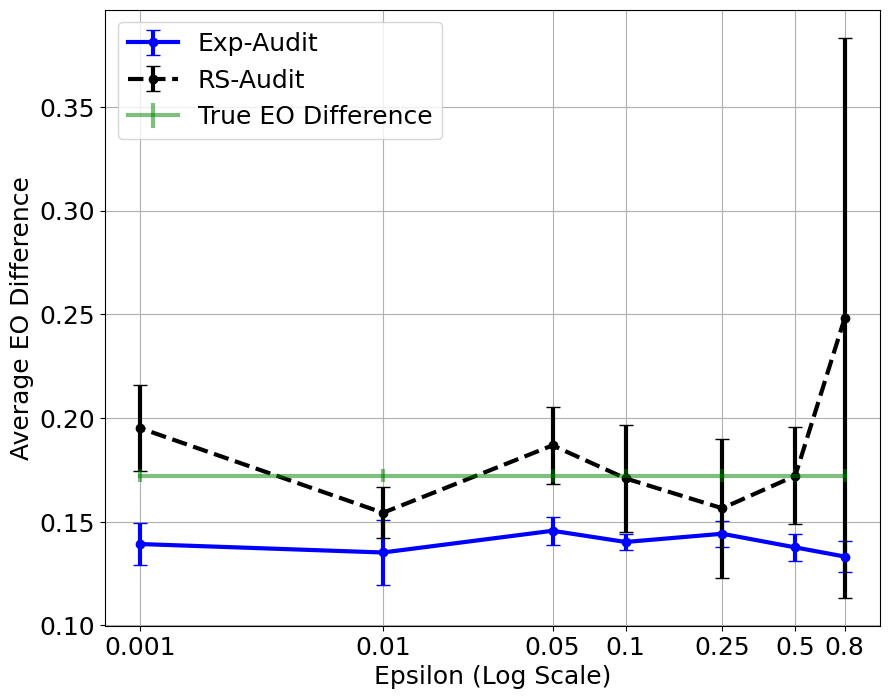

In [7]:
eo_diff_exp = {}
eo_diff_two = {}
eo_diff_true = {}
for run in range(1, 6):
    eo_diff_true[run] = exp_results[(exp_results['run'] == run) & (exp_results['sample_cost_fixed'] == 0.5) & (exp_results['label_cost_fixed'] == 0.25)]['eo_diff_true'].values[0]
    run_data_exp = exp_results[(exp_results['run'] == run) & (exp_results['sample_cost_fixed'] == 0.5) & (exp_results['label_cost_fixed'] == 0.25)]
    run_data_two = two_results[(two_results['run'] == run) & (two_results['sample_cost_fixed'] == 0.5) & (two_results['label_cost_fixed'] == 0.25)]
    for e in eps:
        exp_data = run_data_exp[run_data_exp['eps'] == e]
        two_data = run_data_two[run_data_two['eps'] == e]
        if run == 1:
            eo_diff_exp[e] = [exp_data['eo_diff_est'].values[0]]
            eo_diff_two[e] = [two_data['eo_diff_est'].values[0]]
        else:
            eo_diff_exp[e].append(exp_data['eo_diff_est'].values[0])
            eo_diff_two[e].append(two_data['eo_diff_est'].values[0])
avg_true_eo_diff = np.mean(list(eo_diff_true.values()))
std_true_eo_diff = np.std(list(eo_diff_true.values()))
# Average out the EO differences
avg_eo_diff_exp = {e: np.mean(eo_diff_exp[e]) for e in eps}
avg_eo_diff_two = {e: np.mean(eo_diff_two[e]) for e in eps}
std_eo_diff_exp = {e: np.std(eo_diff_exp[e]) for e in eps}
std_eo_diff_two = {e: np.std(eo_diff_two[e]) for e in eps}
# Plotting the EO differences
plt.figure(figsize=(10, 8))
# # Plot horizontal line with std deviation for true EO difference
# plt.axhline(y=avg_true_eo_diff, color='green', linestyle='-', label='True EO Difference (Avg)')
# plt.fill_between(eps, avg_true_eo_diff - std_true_eo_diff, avg_true_eo_diff + std_true_eo_diff, color='green', alpha=0.2)
plt.errorbar([np.log10(i) for i in eps], list(avg_eo_diff_exp.values()), yerr=list(std_eo_diff_exp.values()), label='Exp-Audit', marker='o', capsize=5, linestyle='-', color='blue', linewidth=3)
plt.errorbar([np.log10(i) for i in eps], list(avg_eo_diff_two.values()), yerr=list(std_eo_diff_two.values()), label='RS-Audit', marker='o', capsize=5, linestyle='--', color='black', linewidth=3)
plt.errorbar([np.log10(i) for i in eps], [avg_true_eo_diff] * len(eps), yerr=[std_true_eo_diff] * len(eps), label='True EO Difference', color='green', linestyle='-', linewidth=3, alpha=0.5)
plt.xticks([np.log10(i) for i in eps], [str(i) for i in eps])
plt.xlabel('Epsilon (Log Scale)')
plt.ylabel('Average EO Difference')
#plt.title('Average EO Difference vs Epsilon')
plt.legend()
plt.grid()
plt.savefig('average_eo_diff_eps.png')
plt.show()